### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Data Analysis

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('House Pricing.csv')

# Display the first five rows of the DataFrame
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement   
0  13300000  7420         4          2        3      yes        no       no  \
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
# Check the shape of the DataFrame
print('Shape of the DataFrame:', df.shape)

# Check for missing values
print('\nMissing values:\n', df.isnull().sum())

# Check the data types of the columns in the DataFrame
print('\nData types: \n', df.dtypes)

# Display summary statistics of the DataFrame
df.describe()

Shape of the DataFrame: (545, 13)

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Data types: 
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


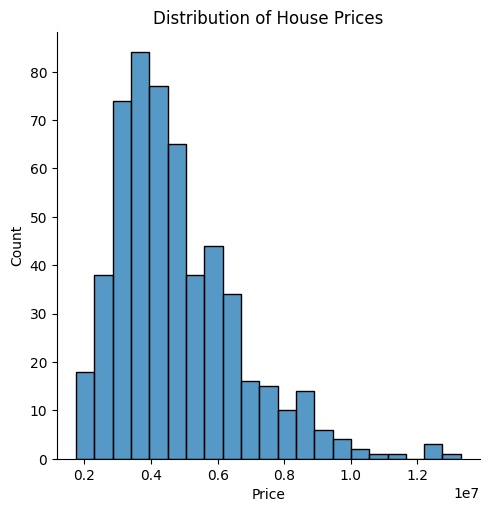

In [4]:
# Visualize the distribution of the target variable
sns.displot(df['price'])
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

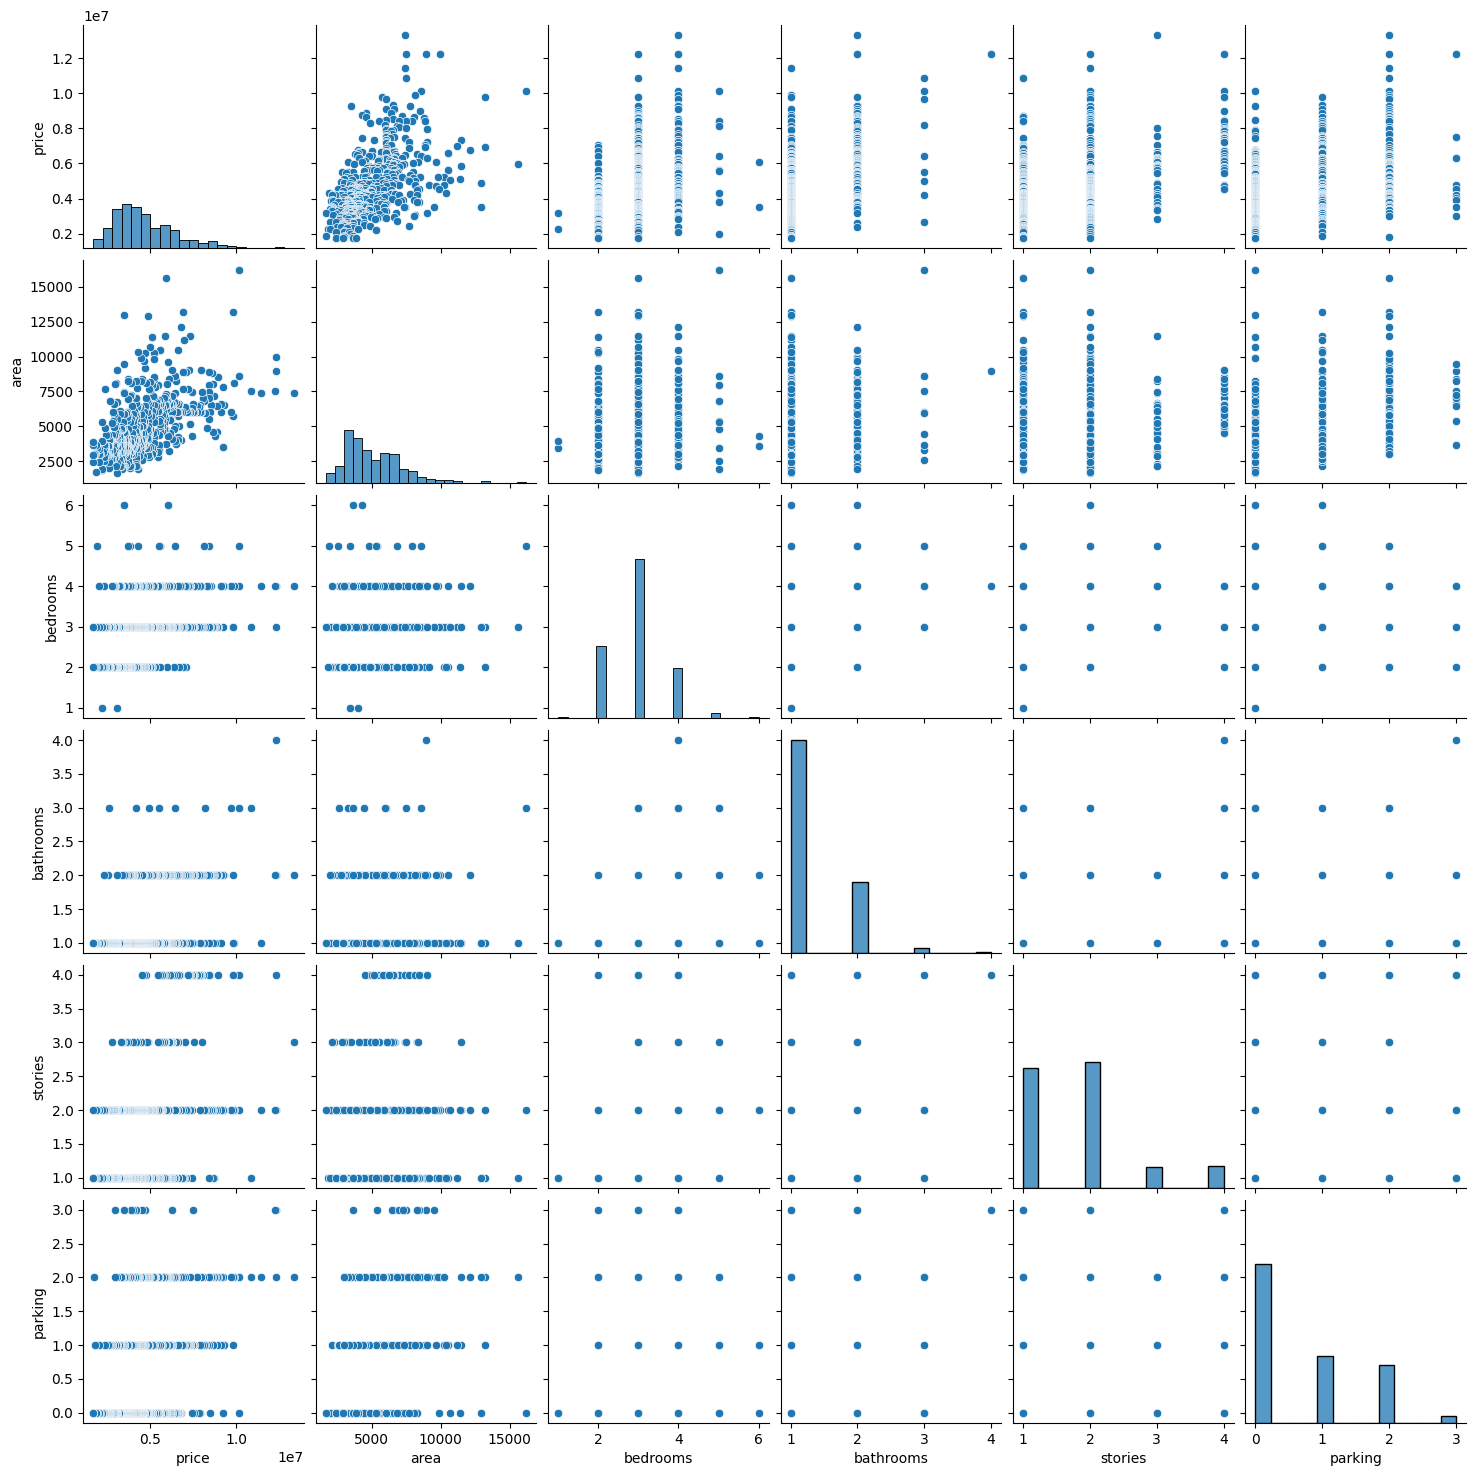

In [5]:
# Visualize the numeric variables
sns.pairplot(data = df)
plt.show()

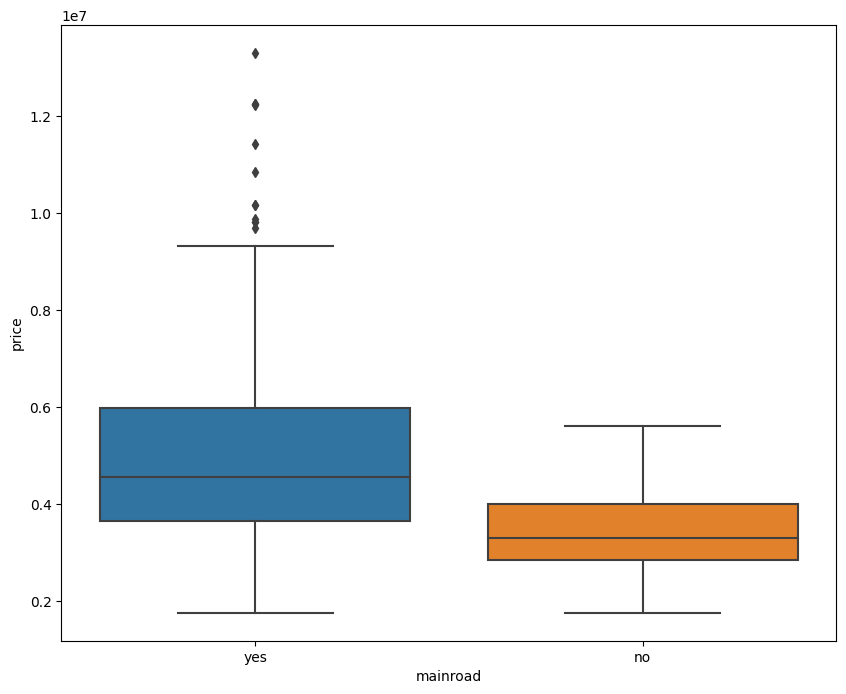

In [6]:
# Visualize categorical variable
plt.figure(figsize=(10,8))
sns.boxplot(x='mainroad', y = 'price', data = df)
plt.show()

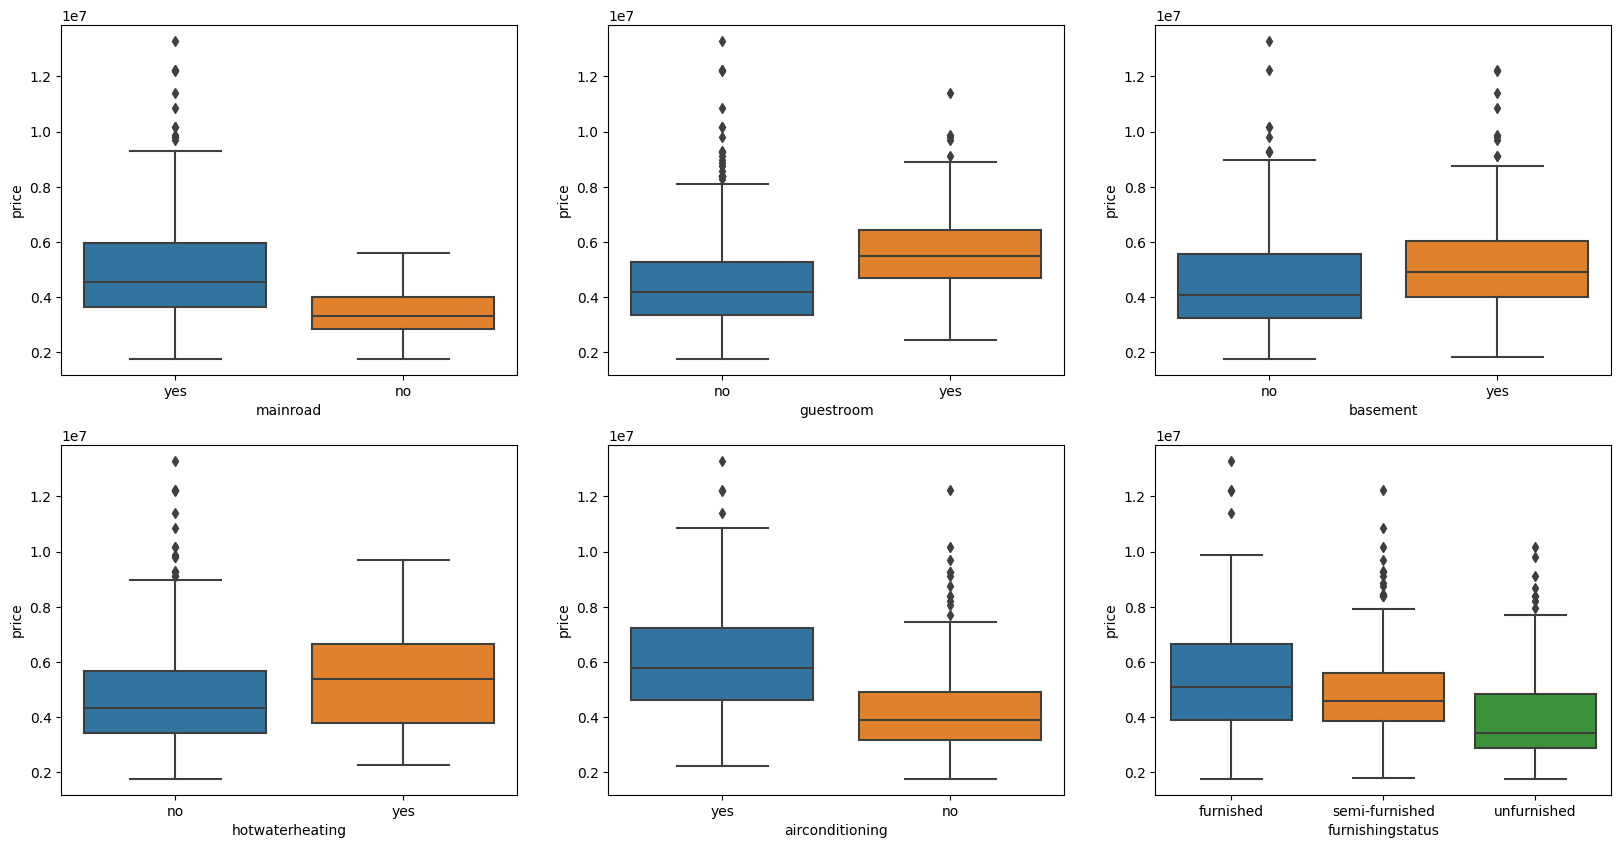

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x='basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus', y = 'price', data = df)
plt.show()

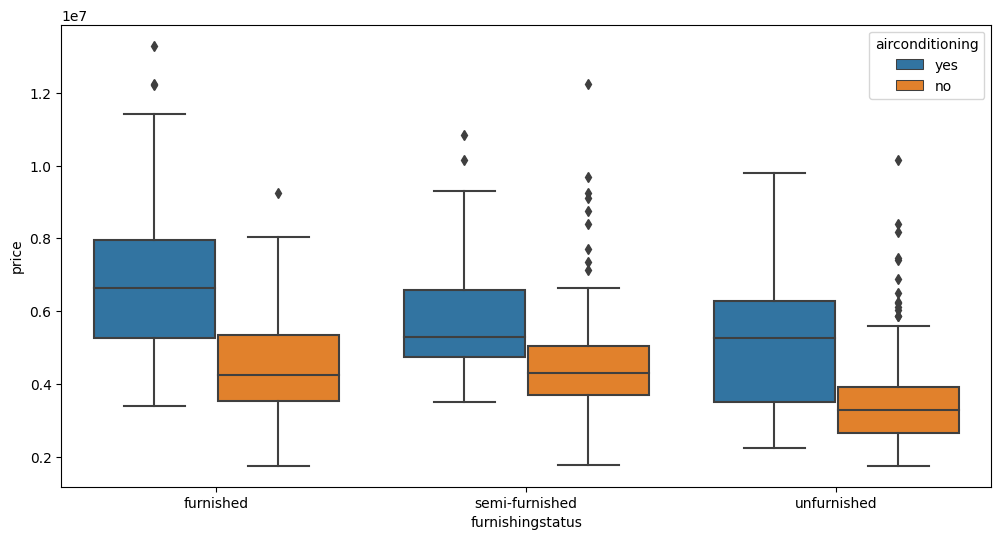

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "furnishingstatus", y = "price", hue = "airconditioning", data = df)
plt.show()

## Data Preprocessing

In [9]:
# Convert categorical variables to numerical variables using one-hot encoding
df = pd.get_dummies(df, columns=['furnishingstatus'])

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,True,False,False
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,True,False,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,False,True,False
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,True,False,False
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,True,False,False


In [11]:
# Convert yes/no values to 1/0
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [12]:
# Dropping redundant furnishingstatus_furnished
df = df.drop('furnishingstatus_furnished', axis=1)

# Rename
df = df.rename(columns={'furnishingstatus_semi-furnished': 'semi-furnished'})
df = df.rename(columns={'furnishingstatus_unfurnished': 'unfurnished'})

# Convert True/False values to 1/0
df['semi-furnished'] = df['semi-furnished'].apply(lambda x: 1 if x == True else 0)
df['unfurnished'] = df['unfurnished'].apply(lambda x: 1 if x == True else 0)

df[['semi-furnished', 'unfurnished']].head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


- 00 - Furnished
- 10 - Semi-furnished
- 01 - Unfurnished

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


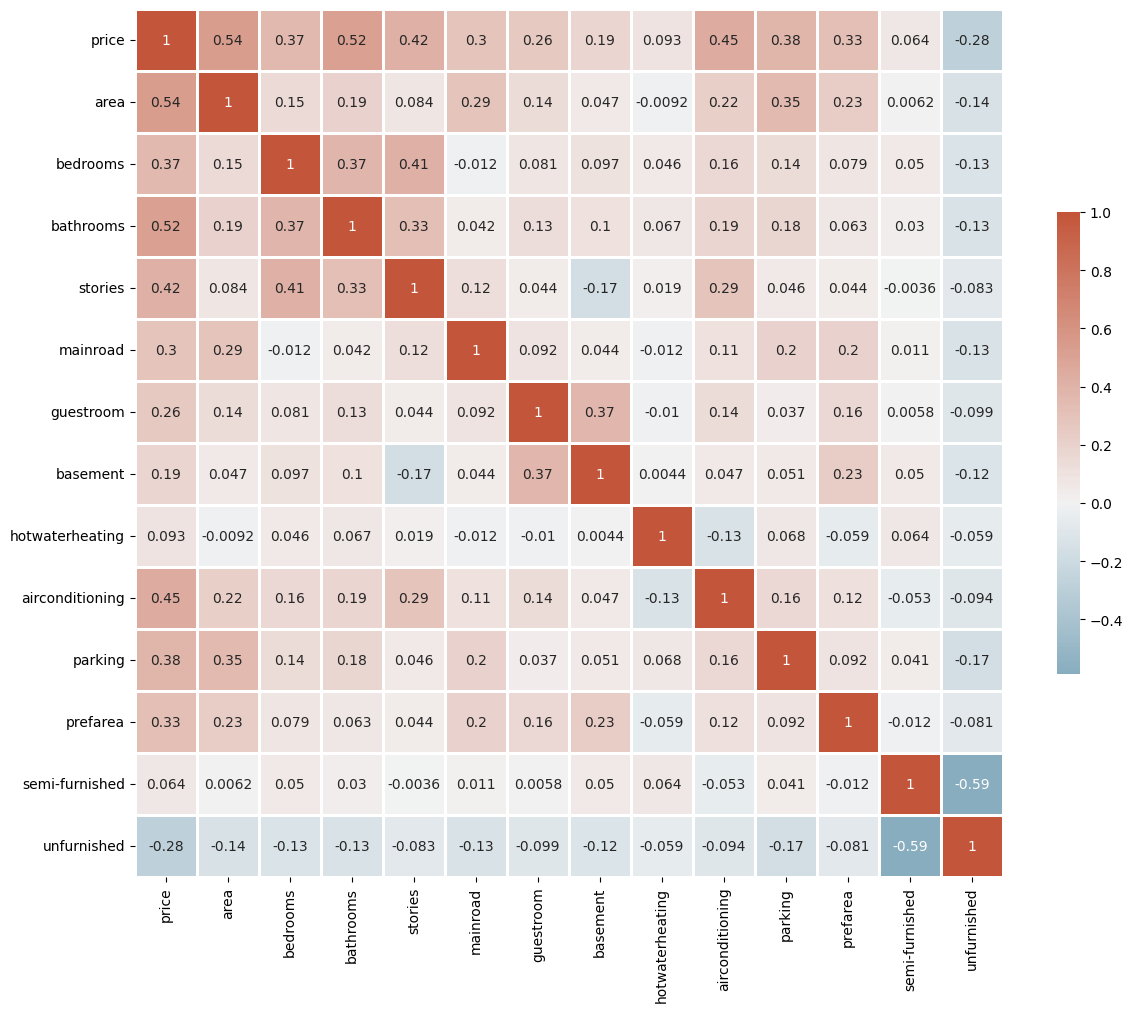

In [14]:
# Compute correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths= 2, annot=True, cbar_kws={"shrink": .5})
plt.show()

# Split the dataset into training and testing sets

In [15]:
# Split the dataset into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling

In [16]:
# Scale both the input features and target variable
scalerX = StandardScaler().fit(X_train)
scalerY = StandardScaler().fit(y_train.values.reshape(-1, 1))

X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

y_train = scalerY.transform(y_train.values.reshape(-1, 1))
y_test = scalerY.transform(y_test.values.reshape(-1, 1))

# Regression Model Development

### Ridge Regression

Ridge Regression
Mean Squared Error: 0.6175430637859001
Root Mean Squared Error: 0.7858390826281804
R-squared: 0.48013361911438746


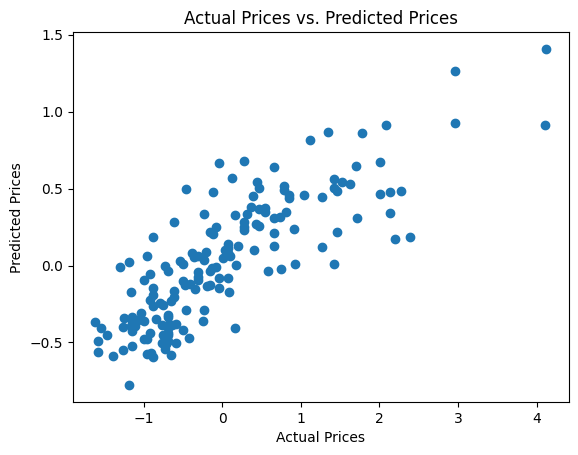

In [17]:
# Initialize the ridge regression model
ridge = Ridge(alpha=1000.0)

# Train the model using the training dataset
ridge.fit(X_train, y_train)

# Evaluate the model using the testing dataset
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print('Ridge Regression')
print('Mean Squared Error:', mse_ridge)
print('Root Mean Squared Error:', rmse_ridge)
print("R-squared:", r2)

# Visualize the predicted vs. actual house prices
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [18]:
# Inverse transform the scaled target variable in the test set to its original scale
real_y = scalerY.inverse_transform(y_test.reshape(-1,1))

# Inverse transform the predicted target variable generated by the trained Ridge regression model back to its original scale
real_y_pred = scalerY.inverse_transform(y_pred_ridge.reshape(-1,1))

# Calculate the difference between the actual and predicted values of the target variable
difference = real_y - real_y_pred

# Create a DataFrame with the actual values, predicted values, and differences between them for the first 20 instances in the test set
pred_y_df = pd.DataFrame({'Actual Value':real_y.flatten(), 'Predicted value': real_y_pred.flatten(), 'Difference': difference.flatten()})
pred_y_df.head(20)

,Actual Value,Predicted value,Difference
0,4403000.0,4.517309e+06,-1.143089e+05
1,7350000.0,5.674248e+06,1.675752e+06
2,5250000.0,5.209472e+06,4.052755e+04
3,4550000.0,5.128449e+06,-5.784489e+05
4,4382000.0,4.916378e+06,-5.343781e+05
5,4690000.0,4.485933e+06,2.040670e+05
6,8540000.0,6.415141e+06,2.124859e+06
7,5250000.0,5.177473e+06,7.252674e+04
8,2730000.0,4.046211e+06,-1.316211e+06
9,5950000.0,5.320303e+06,6.296967e+05


Some predictions have large differences, while others have smaller differences. Overall, it appears that the model could be improved as it is not accurately predicting some of the values.

# Model Evaluation

Text(0, 0.5, 'target value')

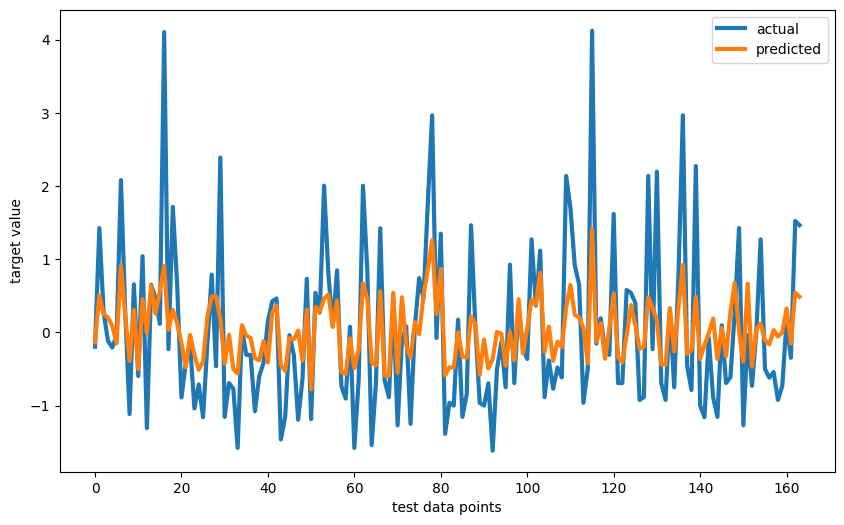

In [19]:
# Plot the ground truth values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='actual')
plt.plot(y_pred_ridge, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

Text(-2, 3.5, 'MSE = 0.618')

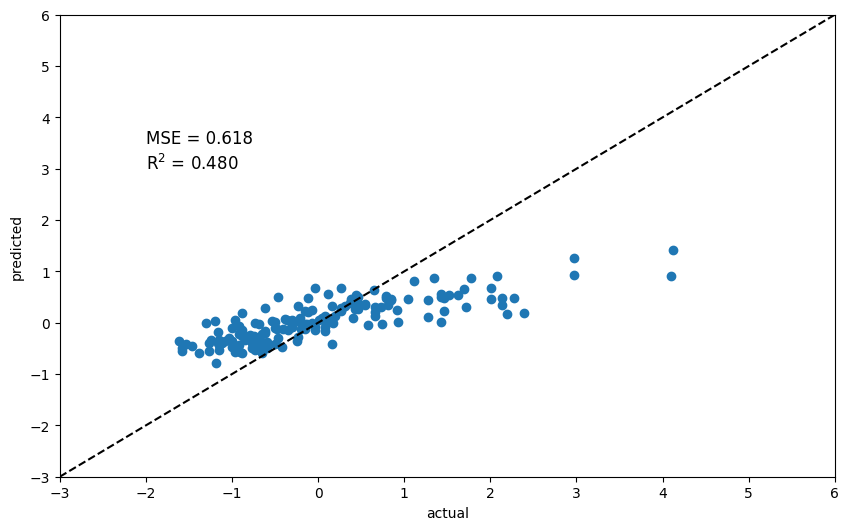

In [20]:
# Plot the ground truth values against the predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred_ridge, 'o')
plt.plot([-3, 6], [-3, 6], 'k--')
plt.axis([-3, 6, -3, 6])
plt.xlabel('actual')
plt.ylabel('predicted')

# Add the R-squared score and mean squared error to the plot
plt.text(-2, 3, 'R$^2$ = {:.3f}'.format(r2), fontsize=12)
plt.text(-2, 3.5, 'MSE = {:.3f}'.format(mse_ridge), fontsize=12)

Ridge Regression
- Mean Squared Error: 0.6175430637859001
- Root Mean Squared Error: 0.7858390826281804
- R-squared: 0.48013361911438746

The Ridge Regression model was evaluated using three metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. The results indicate that the model has some level of predictive power but may not be the best fit for the data. 
- The MSE is 0.6175, which is moderately high, indicating that the model may be underfitting the data. Which also means the model is making predictions that are off by an average of 0.6175 units (squared).
- The RMSE is 0.7858, which is moderately high, indicating that the model may be underfitting.

The R-squared value of 0.48 suggests that the model explains 48% of the variance in the target variable, which is moderate but not strong. Therefore, further model improvement may be necessary to achieve better prediction performance.

# Testing different hyperparameters

### Finding best alpha value for Ridge Regression Model

In [21]:
# Split the dataset into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Using different scaling method (MinMaxScaler)
scalerX = MinMaxScaler().fit(X_train)
scalery = MinMaxScaler().fit(y_train.values.reshape(-1, 1))
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train.values.reshape(-1, 1))
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test.values.reshape(-1, 1))

In [31]:
# Ridge Regression Model

# Set up the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a grid search object
grid_search = GridSearchCV(estimator = Ridge(), param_grid = param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best alpha: ", grid_search.best_params_)

# Create a Ridge regression model with the best hyperparameters
ridge_best = Ridge(alpha=grid_search.best_params_['alpha'])

# Train the model on the training set
ridge_best.fit(X_train, y_train)

# Make predictions on the testing set and calculate the performance metrics
y_pred = ridge_best.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred)

# Print the performance metrics
print('Mean Squared Error:', mse_best)
print('Root Mean Squared Error:', rmse_best)
print("R-squared:", r2_best)

real_y = scalery.inverse_transform(y_test)
real_y_pred = scalery.inverse_transform(y_pred)
difference = real_y - real_y_pred
pred_y_df = pd.DataFrame({'Actual Value':real_y.flatten(), 'Predicted value': real_y_pred.flatten(), 'Difference': (real_y - real_y_pred).flatten()})
pred_y_df[0:20]

Best alpha:  {'alpha': 1}
Mean Squared Error: 0.00961306576569809
Root Mean Squared Error: 0.09804624299634378
R-squared: 0.673356331353163


,Actual Value,Predicted value,Difference
0,4403000.0,4.196766e+06,2.062341e+05
1,7350000.0,6.636800e+06,7.132001e+05
2,5250000.0,5.644182e+06,-3.941819e+05
3,4550000.0,5.344427e+06,-7.944271e+05
4,4382000.0,4.844723e+06,-4.627233e+05
5,4690000.0,4.100890e+06,5.891102e+05
6,8540000.0,8.051392e+06,4.886083e+05
7,5250000.0,5.656940e+06,-4.069401e+05
8,2730000.0,3.462820e+06,-7.328204e+05
9,5950000.0,5.684727e+06,2.652726e+05


Changing alpha from 1000 to 1 improved the results as shown in the table. First, the difference between the actual and predicted values decreased for most of the observations, indicating that the model improved its predictions.

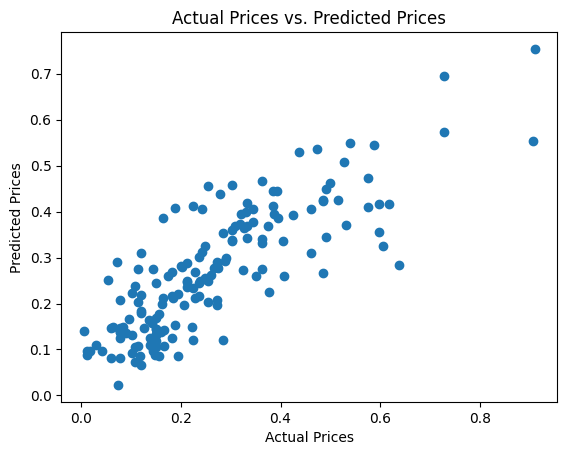

In [32]:
# Visualize the predicted vs. actual house prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

Text(0, 0.5, 'target value')

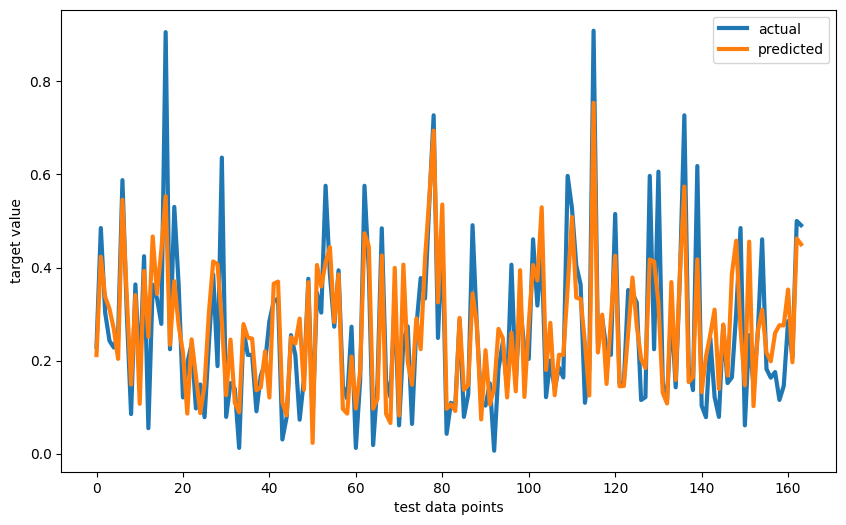

In [34]:
# Plot the ground truth values and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='actual')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

Text(0, 1.25, 'MSE = 0.010')

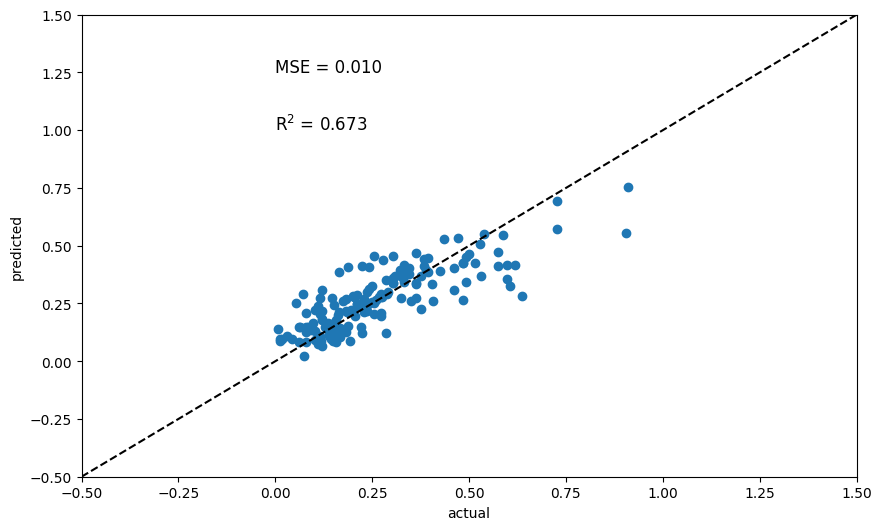

In [40]:
# Plot the ground truth values against the predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-0.5, 1.5], [-0.5, 1.5], 'k--')
plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.xlabel('actual')
plt.ylabel('predicted')

# Add the R-squared score and mean squared error to the plot
plt.text(0, 1, 'R$^2$ = {:.3f}'.format(r2_best), fontsize=12)
plt.text(0, 1.25, 'MSE = {:.3f}'.format(mse_best), fontsize=12)

The initial Ridge regression model had a high MSE of 0.6175 and RMSE of 0.7858 with a low R-squared score of 0.4801, indicating that the model is not a good fit for the data. However, after tuning the hyperparameters using GridSearchCV, the best alpha value was found to be 1.0, resulting in a significant improvement in the model performance. The improved model had a much lower MSE of 0.0096, RMSE of 0.0980, and a higher R-squared score of 0.6734, indicating that it is a much better fit for the data. Overall, the improved Ridge regression model with alpha 1.0 is a much better choice for predicting the housing prices.

- MSE reduced from 0.6175 to 0.0096. This means that the predicted values of the improved model are closer to the actual values, on average, compared to the initial model.
- RMSE reduced from 0.7858 to 0.0980. Which indicates that the model's predictions have lower variance and are more accurate overall.
- R-squared value increased from 0.4801 to 0.6734, the model explains more variance in the target variable and provides a better fit to the data.